# Project: House Price Prediction

In this project, I'd like to predict house price with housing data for the city of Ames, Iowa, United States from 2006 to 2010 by using the `linear regression model`. The data were collected [here](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627), and more information in data descriptions can be found [here](https://s3.amazonaws.com/dq-content/307/data_description.txt).



## Review and Clean Data


In [1]:
#initialize model
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

pd.options.display.max_columns = 999

In [2]:
# read data
data=pd.read_csv('AmesHousing.tsv',sep='\t')
data.head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,2001,2001,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,616.0,Unf,0.0,722.0,1338.0,GasA,Ex,Y,SBrkr,1338,0,0,1338,1.0,0.0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,582.0,TA,TA,Y,0,0,170,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1995,1996,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1180.0,Unf,0.0,415.0,1595.0,GasA,Ex,Y,SBrkr,1616,0,0,1

In [3]:
data.shape

(2930, 82)

We know that the data has 2930 rows and 82 columns. The `SalePrice` column is target values. Other columns(except `Order` columns) may be features that we select for house price predicting.

The average sale price is: 180796.0600682594


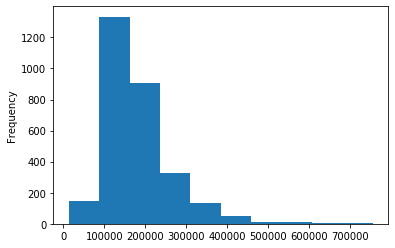

In [4]:
# 'SalePrice' value review
avg_saleprice=data['SalePrice'].mean()
print('The average sale price is: {}'.format(avg_saleprice))
ax=data['SalePrice'].plot(kind='hist')

plt.show()

We can find that the average price is about 180796 dollars and almost of `sale price` data are concentrated in 10,0000 to 25,0000. This means if we create an model for prediction, it's may not give a good predictive performance on high sale price houses.

## Main function

We will generate some main function for our project.

In [5]:
# generate some main function

# transform function
def transform_features(df):
    return df

# select_features function
def select_features(df):
    return df[['Gr Liv Area','SalePrice']]

# train_and_test function
def train_and_test(df):
    train=df.iloc[0:1460]
    test=df.iloc[1460:]
    
    # select numerical columns
    num_train=train.select_dtypes(include=['integer','float'])
    num_test=test.select_dtypes(include=['integer','float'])
    
    # select features except target value `SalePrice`
    features=num_train.columns.drop('SalePrice')
    
    #train model
    lr=linear_model.LinearRegression()
    lr.fit(train[features],train['SalePrice'])
    
    #test model
    predictions=lr.predict(test[features])
    mse=mean_squared_error(test['SalePrice'],predictions)
    rmse=np.sqrt(mse)
    
    return rmse
    
# test function
transformed_df = transform_features(data)
selected_df = select_features(transformed_df)
test_rmse = train_and_test(selected_df)

test_rmse

57088.25161263909

## Feature Engineering

Let's now start removing features with many missing values, diving deeper into potential categorical features, and transforming text and numerical columns. Update transform_features() so that any column from the data frame with more than 25% (or another cutoff value) missing values is dropped.

In general, the goal of this function is to:

* remove features that we don't want to use in the model, just based on the number of missing values or data leakage
* transform features into the proper format (numerical to categorical, scaling numerical, filling in missing values, etc)
* create new features by combining other features


### Handle missing values:
By getting familiar with the columns, we decided:

* All columns:
 * Drop any with 5% or more missing values for now.
* Text columns:
 * Drop any with 1 or more missing values for now.
* Numerical columns:
 * For columns with missing values, fill in with the most common value in that column

1. All columns: Drop any with 5% or more missing values for now.

In [6]:
#drop columns with more than 5% missing values
num_missing=data.isnull().sum()

# Filter Series to columns containing >5% missing values
drop_cols=num_missing[num_missing>0.05*len(data)].index

# # Drop those columns from the data frame.
data=data.drop(columns=drop_cols)
data.shape

(2930, 71)

We have been drop 11 columns that contain more than 5% missing values.

2. Text columns: Drop any with 1 or more missing values for now.

In [7]:
# find text columns with 1 or more missing values for now.
num_text_missing=data.select_dtypes(include='object').isnull().sum()
num_text_missing

MS Zoning          0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type      23
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual         80
Bsmt Cond         80
Bsmt Exposure     83
BsmtFin Type 1    80
BsmtFin Type 2    81
Heating            0
Heating QC         0
Central Air        0
Electrical         1
Kitchen Qual       0
Functional         0
Paved Drive        0
Sale Type          0
Sale Condition     0
dtype: int64

We can find the the following columns that contains more than 1 missing value: `('Mas Vnr Type', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure','BsmtFin Type 1', 'BsmtFin Type 2', 'Electrical')`

In [8]:
# Drop text columns with missing values 
drop_text_cols=num_text_missing[num_text_missing>0].index
data = data.drop(columns = drop_text_cols)
data.shape

(2930, 64)

3. Numerical columns: For columns with missing values, fill in with the most common value in that column

In [9]:
# find numericial columns with missing values
num_numerical_missing=data.select_dtypes(include=['integer','float']).isnull().sum().sort_values(ascending=False)
num_numerical_missing

Mas Vnr Area       23
Bsmt Half Bath      2
Bsmt Full Bath      2
Garage Cars         1
BsmtFin SF 1        1
Total Bsmt SF       1
Bsmt Unf SF         1
BsmtFin SF 2        1
Garage Area         1
PID                 0
Gr Liv Area         0
Lot Area            0
Year Remod/Add      0
Year Built          0
Overall Cond        0
Overall Qual        0
1st Flr SF          0
2nd Flr SF          0
Low Qual Fin SF     0
MS SubClass         0
SalePrice           0
Yr Sold             0
Full Bath           0
Half Bath           0
Bedroom AbvGr       0
Kitchen AbvGr       0
TotRms AbvGrd       0
Fireplaces          0
Wood Deck SF        0
Open Porch SF       0
Enclosed Porch      0
3Ssn Porch          0
Screen Porch        0
Pool Area           0
Misc Val            0
Mo Sold             0
Order               0
dtype: int64

In [10]:
# fill numerical columns with missing values 
fill_numerical_cols=num_numerical_missing[num_numerical_missing>0].index

# use mode numbers to fill missing values
data[fill_numerical_cols]=data[fill_numerical_cols].fillna(data.mode().iloc[0])

# verify that every column has 0 missing values
data.isnull().sum().value_counts()

0    64
dtype: int64

### Creating new Features

We'll focus on the `Year Remod/Add` and `Year Built` columns. 

In [11]:
data[['Year Remod/Add', 'Year Built']].head()

,Year Remod/Add,Year Built
0,1960,1960
1,1961,1961
2,1958,1958
3,1968,1968
4,1998,1997


The two main issues with these features are:

* Year values aren't representative of how old a house is
* The Year `Remod/Add column` doesn't actually provide useful information for a linear regression model

To be able to use them in the modeling I am going to make two new columns from them to show how many years have passed from the construction and remodeling.

In [12]:
# create two new columns
data['year_since_built'] = data['Yr Sold'] - data['Year Built']
data['year_since_remodel'] = data['Yr Sold'] - data['Year Remod/Add']

In [13]:
# verify two new columns if there are some invalid values
print(data[data['year_since_built']<0]['year_since_built'])
print(data[data['year_since_remodel']<0]['year_since_remodel'])

2180   -1
Name: year_since_built, dtype: int64
1702   -1
2180   -2
2181   -1
Name: year_since_remodel, dtype: int64


In [14]:
# drop invalid values
data=data.drop(index=[2180,1702,2181])

# Drop the original year columns
data=data.drop(columns=["Year Built", "Year Remod/Add"])

In [15]:
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,year_since_built,year_since_remodel
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,Hip,CompShg,BrkFace,Plywood,112.0,TA,TA,CBlock,639.0,0.0,441.0,1080.0,GasA,Fa,Y,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,2.0,528.0,P,210,62,0,0,0,0,0,5,2010,WD,Normal,215000,50,50
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,CBlock,468.0,144.0,270.0,882.0,GasA,TA,Y,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,1.0,730.0,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,105000,49,49
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,Hip,CompShg,Wd Sdng,Wd Sdng,108.0,TA,TA,CBlock,923.0,0.0,406.0,1329.0,GasA,TA,Y,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,1.0,312.0,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,172000,52,52
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,Hip,CompShg,BrkFace,BrkFace,0.0,Gd,TA,CBlock,1065.0,0.0,1045.0,2110.0,GasA,Ex,Y,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,2.0,522.0,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,244000,42,42
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,791.0,0.0,137.0,928.0,GasA,Gd,Y,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,2.0,482.0,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,189900,13,12


### drop columns 

Drop columns that:

* that aren't useful for Meachine Learning
* leak data about the final sale, read more about columns [here](https://s3.amazonaws.com/dq-content/307/data_description.txt)

In [16]:
# Drop columns not useful for ML
data = data.drop(columns = ["PID", "Order"])

# Drop columns that leak info about the final sale
data = data.drop(columns = ["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"])

## Update transform_features function

In [17]:
# update transform_features function
def transform_features(df):
    # drop more than 5% missing value in columns
    num_missing=df.isnull().sum()
    drop_cols=num_missing[num_missing>0.05*(len(df))].index
    df=df.drop(columns=drop_cols)
    
    # drop text columns with missing value
    num_text_missing=df.select_dtypes(include='object').isnull().sum()
    drop_text_cols=num_text_missing[num_text_missing>0].index
    df=df.drop(columns=drop_text_cols)
    
    #fill missing value columns
    num_numerical_missing=df.select_dtypes(include=['integer','float']).isnull().sum()
    fill_numerical_cols=num_numerical_missing[num_numerical_missing>0].index
    df[fill_numerical_cols]=df[fill_numerical_cols].fillna(df.mode().iloc[0])
    
    #create new feature
    df['year_since_built'] = df['Yr Sold'] - df['Year Built']
    df['year_since_remodel'] = df['Yr Sold'] - df['Year Remod/Add']
    
    # Drop rows with negative values for both of these new features
    df = df.drop(index = [1702, 2180, 2181])
    # Drop the original year columns
    df = df.drop(columns = ["Year Built", "Year Remod/Add"])
    
    # Drop columns not useful for ML
    df = df.drop(columns = ["PID", "Order"])
    
    # Drop columns that leak info about the final sale
    df = df.drop(columns = ["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"])

    return df

#test
df = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)

rmse
    

55275.367312413066

## Feature Selection

Now that we have cleaned and transformed a lot of the features in the data set, it's time to move on to feature selection for numerical features.



In [18]:
# Generate a correlation matrix 
corr_mat=transform_df.select_dtypes(include=['integer','float']).corr()
corr_mat.head()

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,year_since_built,year_since_remodel
MS SubClass,1.000000,-0.204638,0.040285,-0.067498,0.005502,-0.058276,-0.070936,-0.129873,-0.219990,-0.250497,0.304430,0.025743,0.071166,0.014516,-0.002027,0.134997,0.176359,-0.019531,0.257685,0.033684,-0.049386,-0.045453,-0.102769,-0.016283,-0.013309,-0.022963,-0.037988,-0.050696,-0.003451,-0.024356,-0.085128,-0.037655,-0.044886
Lot Area,-0.204638,1.000000,0.090426,-0.033487,0.114982,0.180192,0.084454,0.020899,0.241353,0.321311,0.030381,0.001105,0.273741,0.122329,0.022168,0.123632,0.032169,0.138303,-0.019809,0.208241,0.254772,0.176283,0.207487,0.152849,0.089202,0.023004,0.016619,0.056135,0.094421,0.038013,0.267520,-0.020882,-0.019848
Overall Qual,0.040285,0.090426,1.000000,-0.093907,0.418972,0.278274,-0.040551,0.268760,0.545792,0.474888,0.240300,-0.048585,0.567902,0.167279,-0.044949,0.520942,0.266939,0.064220,-0.159729,0.376199,0.391604,0.598485,0.561303,0.253120,0.290553,-0.139907,0.018537,0.042412,0.030638,-0.027685,0.801206,-0.596358,-0.570231
Overall Cond,-0.067498,-0.033487,-0.093907,1.000000,-0.132071,-0.050143,0.040846,-0.136758,-0.174840,-0.157746,0.006674,0.009123,-0.114930,-0.043252,0.084988,-0.213914,-0.087566,-0.006257,-0.086507,-0.088903,-0.031147,-0.181083,-0.153249,0.021046,-0.067152,0.071287,0.043804,0.043915,-0.016822,0.047066,-0.101540,0.369267,-0.046373
Mas Vnr Area,0.005502,0.114982,0.418972,-0.132071,1.000000,0.284305,-0.014139,0.087535,0.378545,0.376205,0.119674,-0.057375,0.387355,0.137158,0.008756,0.252318,0.186587,0.083399,-0.050531,0.267328,0.267449,0.354753,0.365786,0.158743,0.123395,-0.109775,0.014689,0.068366,0.005143,-0.022884,0.506983,-0.306163,-0.190821


In [19]:
abs_corr_coeffs = corr_mat['SalePrice'].abs().sort_values(ascending=False)
abs_corr_coeffs

SalePrice             1.000000
Overall Qual          0.801206
Gr Liv Area           0.717596
Garage Cars           0.648361
Total Bsmt SF         0.644012
Garage Area           0.641425
1st Flr SF            0.635185
year_since_built      0.558979
Full Bath             0.546118
year_since_remodel    0.534985
Mas Vnr Area          0.506983
TotRms AbvGrd         0.498574
Fireplaces            0.474831
BsmtFin SF 1          0.439284
Wood Deck SF          0.328183
Open Porch SF         0.316262
Half Bath             0.284871
Bsmt Full Bath        0.276258
2nd Flr SF            0.269601
Lot Area              0.267520
Bsmt Unf SF           0.182751
Bedroom AbvGr         0.143916
Enclosed Porch        0.128685
Kitchen AbvGr         0.119760
Screen Porch          0.112280
Overall Cond          0.101540
MS SubClass           0.085128
Pool Area             0.068438
Low Qual Fin SF       0.037629
Bsmt Half Bath        0.035875
3Ssn Porch            0.032268
Misc Val              0.019273
BsmtFin 

In [20]:
# Let's only keep columns with a correlation coefficient of larger than 0.4
correlated_cols=abs_corr_coeffs[abs_corr_coeffs > 0.4]
correlated_cols

SalePrice             1.000000
Overall Qual          0.801206
Gr Liv Area           0.717596
Garage Cars           0.648361
Total Bsmt SF         0.644012
Garage Area           0.641425
1st Flr SF            0.635185
year_since_built      0.558979
Full Bath             0.546118
year_since_remodel    0.534985
Mas Vnr Area          0.506983
TotRms AbvGrd         0.498574
Fireplaces            0.474831
BsmtFin SF 1          0.439284
Name: SalePrice, dtype: float64

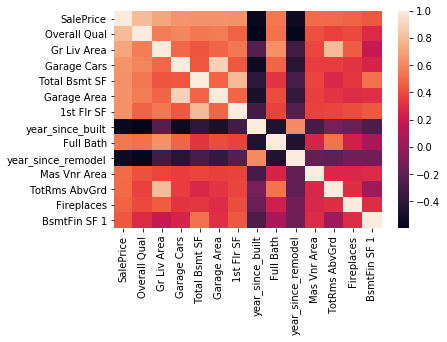

In [21]:
# Drop columns with less than 0.4 correlation with SalePrice
corr_df=transform_df[correlated_cols.index]
# generate heatmap
corrmat=corr_df.corr()
sns.heatmap(corrmat)

Based on the correlation matrix heatmap, I can tell that the following pairs of columns are strongly correlated:

* `Gr Liv Area` and `TotRms AbvGrd`
* `Garage Area` and `Garage Cars`

Looking at the data documentation, I can tell that each pair of columns reflects very similar information. Because `Gr Liv Area` and `Garage Area` are continuous variables that capture more nuance, let's drop the TotRms AbvGrd and Garage Cars.

In [22]:
transform_df = transform_df.drop(columns = ['TotRms AbvGrd', 'Garage Cars'])

### Categorical column

All of the columns that can be categorized as nominal variables are candidates for being converted to categorical.
Here are some other things you should think about:

* If a categorical column has hundreds of unique values (or categories), should you keep it? When you dummy code this column, hundreds of columns will need to be added back to the data frame.
* Which categorical columns have a few unique values but more than 95% of the values in the column belong to a specific category? This would be similar to a low variance numerical feature (no variability in the data for the model to capture).
* Which columns are currently numerical but need to be encoded as categorical instead (because the numbers don't have any semantic meaning)?

In [23]:
# list of column names from documentation that are to be categorical
nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]


In [24]:
## Which categorical columns have we still carried with us
transform_cat_cols=list(set(nominal_features).intersection(transform_df.columns))
transform_cat_cols

['Condition 2',
 'Exterior 2nd',
 'Condition 1',
 'Foundation',
 'Lot Config',
 'MS SubClass',
 'House Style',
 'Central Air',
 'Bldg Type',
 'MS Zoning',
 'Exterior 1st',
 'Heating',
 'Neighborhood',
 'Street',
 'Roof Style',
 'Land Contour',
 'Roof Matl']

In [25]:
#Remove the columns with more than 10 unique values
for col in transform_cat_cols:
    if len(transform_df[col].value_counts())>10:
        transform_cat_cols.remove(col)
        transform_df=transform_df.drop(columns=[col])

transform_cat_cols        

['Condition 2',
 'Condition 1',
 'Foundation',
 'Lot Config',
 'House Style',
 'Central Air',
 'Bldg Type',
 'MS Zoning',
 'Heating',
 'Street',
 'Roof Style',
 'Land Contour',
 'Roof Matl']

Let's see which categorical columns have a few unique values and more than 95% of the values in the column belong to a specific category. These columns would be similar to  low variance numerical features (no variability in the data for the model to capture).

In [26]:
#Find low variance columns
low_variance={}
for col in transform_cat_cols:
    x=transform_df[col].value_counts(normalize=True)
    low_variance[col]=x
low_variance_cols=[]
for k,v in low_variance.items():
    values=v.values
    for value in values:
        if value>0.95:
            low_variance_cols.append(k)
            
low_variance_cols
    


['Condition 2', 'Heating', 'Street', 'Roof Matl']

In [27]:
#Drop low variance columns
for col in low_variance_cols:
    transform_cat_cols.remove(col)
transform_df = transform_df.drop(columns = low_variance_cols)
transform_cat_cols

['Condition 1',
 'Foundation',
 'Lot Config',
 'House Style',
 'Central Air',
 'Bldg Type',
 'MS Zoning',
 'Roof Style',
 'Land Contour']

In [28]:
##Change the type of the transformed_cat_cols columns to category
for col in transform_cat_cols:
    transform_df[col] = transform_df[col].astype('category')

## Create dummy columns and add back to the dataframe!
transform_df=pd.concat([transform_df, pd.get_dummies(transform_df.select_dtypes(include=['category']))],axis=1)
transform_df=transform_df.drop(columns=transform_cat_cols)

In [29]:
transform_df.head(5)

,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Mas Vnr Area,Exter Qual,Exter Cond,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,Functional,Fireplaces,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,year_since_built,year_since_remodel,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Central Air_N,Central Air_Y
0,31770,IR1,AllPub,Gtl,6,5,112.0,TA,TA,639.0,0.0,441.0,1080.0,Fa,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,Typ,2,528.0,P,210,62,0,0,0,0,0,215000,50,50,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
1,11622,Reg,AllPub,Gtl,5,6,0.0,TA,TA,468.0,144.0,270.0,882.0,TA,896,0,0,896,0.0,0.0,1,0,2,1,TA,Typ,0,730.0,Y,140,0,0,0,120,0,0,105000,49,49,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
2,14267,IR1,AllPub,Gtl,6,6,108.0,TA,TA,923.0,0.0,406.0,1329.0,TA,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,Typ,0,312.0,Y,393,36,0,0,0,0,12500,172000,52,52,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
3,11160,Reg,AllPub,Gtl,7,5,0.0,Gd,TA,1065.0,0.0,1045.0,2110.0,Ex,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,Typ,2,522.0,Y,0,0,0,0,0,0,0,244000,42,42,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
4,13830,IR1,AllPub,Gtl,5,5,0.0,TA,TA,791.0,0.0,137.0,928.0,Gd,928,701,0,1629,0.0,0.0,2,1,3,1,TA,Typ,1,482.0,Y,212,34,0,0,0,0,0,189900,13,12,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1


## update select_features function 

In [30]:
def select_features(df):
    
    #Remove strongly correlated columns
    df = df.drop(columns = ['TotRms AbvGrd', 'Garage Cars'])
    
    #List of nominal columns according to the documentation
    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]
    #Make the list of nomial features that belongs to df 
    transformed_cat_cols = list(set(nominal_features).intersection(set(df.columns)))
    
    #Remove the columns with more than 10 unique values
    for col in transformed_cat_cols:
        if len(df[col].value_counts()) > 10:
            transformed_cat_cols.remove(col)
            df = df.drop(columns = [col])
            
    #Find and remove low variance columns
    num_rows = len(df)
    low_variance_cols = []
    for col in transformed_cat_cols:
        unique_values = df[col].value_counts()
        for value in unique_values:
            if value > 0.95*num_rows:
                low_variance_cols.append(col)
                break
    for col in low_variance_cols:
        transformed_cat_cols.remove(col)
    df = df.drop(columns = low_variance_cols)
    
    #Change the type of the transformed_cat_cols columns to category
    for col in transformed_cat_cols:
        df[col] = df[col].astype('category')

    # Create dummy columns and add back to the dataframe!
    df = pd.concat([
        df, 
        pd.get_dummies(df.select_dtypes(include=['category']))
    ], axis=1).drop(transformed_cat_cols,axis=1)

    return df

In [31]:
#test
data = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transformed_df = transform_features(data)
selected_df = select_features(transformed_df)
rmse = train_and_test(selected_df)
rmse

63272.580208014566

## Cross Validation
We next apply cross validation on our prediction model. we will use k-fold cross validation to determin best k values.


In [32]:
def train_and_test(df, k = 0):
    target = 'SalePrice'
    features = df.select_dtypes(include=['integer', 'float']).columns.drop(target)
    lr = linear_model.LinearRegression()
    std_rmse = 0
    
    if k == 0:
        train = df[:1460]
        test = df[1460:]

        #Train
        lr.fit(train[features], train[target])

        #Test and calculate error
        predictions = lr.predict(test[features])    
        mse = mean_squared_error(test[target], predictions)
        rmse = np.sqrt(mse)
    elif k == 1:
        np.random.seed(1)
        shuffled_df = df.sample(frac=1, )
        fold_one = df[:1460]
        fold_two = df[1460:]        
        
        #Train fold_one and test on fold_two        
        lr.fit(fold_one[features], fold_one[target])
        predictions = lr.predict(fold_two[features])    
        mse = mean_squared_error(fold_two[target], predictions)
        rmse_12 = np.sqrt(mse)
        
        #Train fold_two and test on fold_one        
        lr.fit(fold_two[features], fold_two[target])
        predictions = lr.predict(fold_one[features])    
        mse = mean_squared_error(fold_one[target], predictions)
        rmse_21 = np.sqrt(mse)
        
        rmse = (rmse_12 + rmse_21)/2
    else:
        kf = KFold(k, shuffle=True, random_state=1) 
        mses = cross_val_score(lr, df[features], df[target], scoring="neg_mean_squared_error", cv=kf)
        rmses = np.sqrt(np.absolute(mses))
        rmse = np.mean(rmses)
        std_rmse = np.std(rmses)
        predictions = cross_val_predict(lr, df[features], df[target], cv = kf)
        
    return rmse, std_rmse, predictions
        
        
        

In [33]:
# test finished function
df = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transformed_df = transform_features(df)
selected_df = select_features(transformed_df)
rmse, std, predictions = train_and_test(selected_df, k=4)

rmse

30680.05822877792

In [34]:
# determined best k for better result
rmses = []
stds = []
for k in range(0,12):
    rmse, std, p = train_and_test(selected_df, k=k)
    rmses.append(rmse)
    stds.append(std)
rmses


[63272.580208014566,
 46217.6862181258,
 30806.0692082541,
 30471.46914360914,
 30680.05822877792,
 30323.291239771606,
 30216.966786423145,
 30301.52193965233,
 30312.601955237045,
 30202.415413784373,
 30096.190566748606,
 30014.20830939509]

In [35]:
stds

[0,
 0,
 2336.5256354810026,
 3535.9908710205405,
 4564.928609854022,
 5534.541022273293,
 6168.099869385396,
 5902.81246471288,
 6240.742621208746,
 6609.657387924915,
 7078.23070480023,
 7349.657801835135]

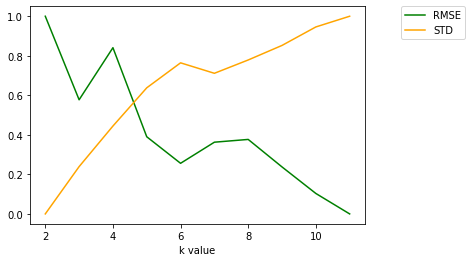

In [36]:
#visulization
rmses_2= rmses[2:]
stds_2 = stds[2:]
x = range(2, 12)

#RMSE
y = (rmses_2 - min(rmses_2))/(max(rmses_2) - min(rmses_2))
plt.plot(x,y, label = 'RMSE', color='green')
plt.xlabel('k value')

#STD
y = (stds_2 - min(stds_2))/(max(stds_2) - min(stds_2))
plt.plot(x,y, label = 'STD', color='orange')
plt.legend(bbox_to_anchor=(1.3,1), borderaxespad=0)
plt.show()

The goal is to get the lowest possible RMSE and STD which is actually a trade-off. Looking at the above plot, the best k seems to be 4.

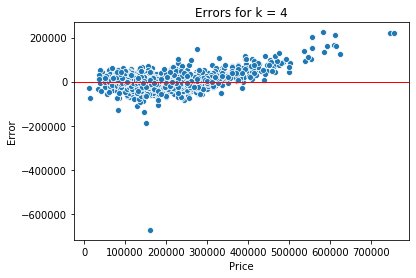

In [37]:
# scatter plot for error
x=selected_df['SalePrice']
y=np.array(selected_df['SalePrice']) - np.array(predictions)
axes=sns.scatterplot(x = x, y = y)
axes.set_xlabel('Price')
axes.set_ylabel('Error')
axes.set_title('Errors for k = 4')
axes.axhline(linewidth=1, color='r')
plt.show()

The above error plots show that model predictions are more accurate for the cheaper houses (less than $400000).

# Conclusion
In this project, we use Linear Regression Model for predicting house price. We first use `feature engineering` and `feature selection` techniques to select best features. Other documents give some idea to select best features are [here](https://machinelearningmastery.com/feature-selection-machine-learning-python/). We will use it for further research.

And Thanks for [jafarinasim](https://community.dataquest.io/t/feedback-about-predicting-house-sale-prices/532047) did same project that give me best idea to find best `k-values` when I used `K-Fold Cross-Validation` method.